In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Importing dataset
url="https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv"
dataframe=pd.read_csv(url)
dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# drop car_name as it is useless
dataframe1=dataframe.drop('name',axis=1)
dataframe1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# converting number into dummy variables since origin 1,2,3 are continent names that are America, Europe, Asia respectively.
dataframe2=pd.get_dummies(dataframe1,columns=['origin'])
dataframe2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [5]:
# check missing values
print (dataframe2.dtypes, dataframe2.shape, sep='\n')

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object
(398, 10)


In [6]:
dataframe2.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_1,origin_2,origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


No zero as minimum value in all columns except origin columns

In [7]:
# Since there are missing values in horse power column by checking its dtype

dataframe2.horsepower.str.isdigit().sum()

392

In [8]:
#  we will convert replace nondigit with nan value
dataframe3=dataframe2.replace('?', np.nan)

In [9]:
null_columns=dataframe3.columns[dataframe3.isnull().any()]
print (null_columns)

Index(['horsepower'], dtype='object')


It means only horsepower column has missing values(NaN).

In [10]:
# records with nan value
dataframe3[dataframe3["horsepower"].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [11]:
# replacing with median
dataframe3.median()
dataframe4=dataframe3.apply(lambda x: x.fillna(x.median()),axis=0)

In [12]:
dataframe4.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin_1          int64
origin_2          int64
origin_3          int64
dtype: object

In [13]:
dataframe4['horsepower']=dataframe4['horsepower'].astype('float64')
dataframe4.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin_1          int64
origin_2          int64
origin_3          int64
dtype: object

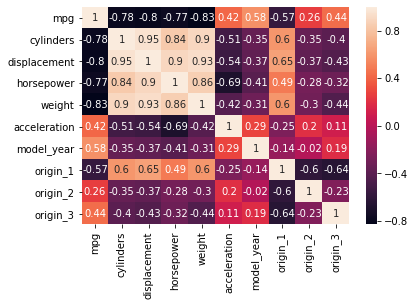

In [14]:
# building the correlation matrix
correlation_matrix = dataframe4.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)

In [15]:
# splitting dataset into input and output
X=dataframe4.iloc[:,1:].values
y=dataframe4.iloc[:,0].values
print (X,y,sep='\n')

[[  8. 307. 130. ...   1.   0.   0.]
 [  8. 350. 165. ...   1.   0.   0.]
 [  8. 318. 150. ...   1.   0.   0.]
 ...
 [  4. 135.  84. ...   1.   0.   0.]
 [  4. 120.  79. ...   1.   0.   0.]
 [  4. 119.  82. ...   1.   0.   0.]]
[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.
 12.  13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.
 26.  24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.
 13.  19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.
 27.  13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.
 16.  18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.
 19.  21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.
 21.  19.  15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.
 14.  29.  26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.
 1

In [16]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_predict=linear_reg.predict(X_test)

In [19]:
linear_reg.intercept_

-17.601394257298615

In [20]:
linear_reg.coef_

array([-0.40049916,  0.02520759, -0.02094486, -0.00666779,  0.1906389 ,
        0.76530499, -1.93143544,  0.72523152,  1.20620391])

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8273599478353487

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

10.95528453023184

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(linear_reg, X_train, y_train, cv=5)
print (scores, scores.mean(), sep='\n')

[0.80212422 0.78357003 0.78667781 0.86195461 0.81076537]
0.8090184065462209


In [29]:
# Tuning hyperparameter
from sklearn.linear_model import RidgeCV

In [70]:
regression=RidgeCV(alphas=[0.5,0.1,0.05,2,3,4,5,6,7,8])

In [71]:
regression.fit(X_train,y_train)

RidgeCV(alphas=array([0.5 , 0.1 , 0.05, 2.  , 3.  , 4.  , 5.  , 6.  , 7.  , 8.  ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [72]:
regression.alpha_

7.0

In [132]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

for i in [0.05,0.5,0.1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,23,24]:
    Ridge_regression=Ridge(alpha=i)
    Ridge_regression.fit(X_train,y_train)
    y_predicted=Ridge_regression.predict(X_test)
    print('Coefficients : ', Ridge_regression.coef_)
    print('r2_score : ', r2_score(y_test,y_predicted))
        

Coefficients :  [-0.40008015  0.02518855 -0.02093049 -0.00666787  0.19062952  0.76528364
 -1.92975487  0.7245962   1.20515867]
r2_score :  0.8273660035738473
Coefficients :  [-0.39634553  0.02501865 -0.02080245 -0.00666858  0.19054499  0.76509223
 -1.91476043  0.71892712  1.1958333 ]
r2_score :  0.8274189076083059
Coefficients :  [-0.39966196  0.02516953 -0.02091616 -0.00666795  0.19062014  0.76526231
 -1.92807723  0.72396197  1.20411526]
r2_score :  0.8273720233816897
Coefficients :  [-0.39227149  0.02483303 -0.02066277 -0.00666935  0.19045077  0.76488115
 -1.89837096  0.7127295   1.18564145]
r2_score :  0.8274744165878328
Coefficients :  [-0.38435355  0.02447145 -0.02039133 -0.00667081  0.19026146  0.76446386
 -1.86641974  0.70064393  1.1657758 ]
r2_score :  0.8275756810058287
Coefficients :  [-0.37672885  0.0241222  -0.02012999 -0.00667219  0.19007106  0.76405284
 -1.83552638  0.68895435  1.14657203]
r2_score :  0.8276648683937134
Coefficients :  [-0.36938205  0.02378465 -0.01987824